 # Analisis TransJakarta 

## **Latar Belakang**

Transjakarta adalah sistem transportasi bus rapid transit (BRT) pertama di Asia Tenggara dan Selatan, yang mulai beroperasi di Jakarta pada tahun 2004. Sistem ini dirancang untuk mengatasi kemacetan lalu lintas di Jakarta dengan menyediakan jalur khusus untuk bus Transjakarta, sehingga bus dapat beroperasi lebih lancar dan penumpang dapat tiba di tujuan mereka lebih cepat dan tepat waktu.

Seiring berjalan nya waktu, TransJakarta mengimplementasikan kebijakan tap in dan tap out dengan beberapa tujuan utama, yaitu: mengelola tarif integrasi dan sistem pembayaran, mengurangi penyalahgunaan serta meningkatkan keamanan sistem, meningkatkan efisiensi dan kualitas layanan, serta mendorong budaya tertib dan modernisasi transportasi.

Dengan lebih dari 800.000 penumpang per hari, TransJakarta menjadi salah satu moda transportasi terbesar di Indonesia. Namun, tantangan tetap ada seperti:

* Kasus pelecehan seksual terhadap penumpang khusus nya perempuan 

* Kurangnya fasilitas untuk halte yang kurang ramah untuk lansia dan anak anak 

* Kepadatan pada jam tertentu menjadi kendala utama, untuk menciptakan antrean panjang dan waktu menunggu yang tinggi


Dengan lebih dari 800.000 penumpang perhari, TransJakarta tentunya bisa menambah pendapatan dengan lebih mengoptimalkan sarana halte sebagai media marketing bagi perusahaan lain, sehingga bisa menambah penghasilan. Contoh nya saja Naming Rights yang dilakukan D'Masiv saat anniversary nya yang ke 22 yang ditaksir nilai kontrak nya bisa mencapai 1 M per tahun. 


Sumber :  
 https://metro.tempo.co/read1805094pelecehan-seksual-di-bus-transjakarta-yang-viral-di-medsos-ini-penuturan-satu-korbannya

https://www.kompas.id/baca/metro/2023/03/15/penumpang-idamkan-jpo-halte-transjakarta-yang-inklusif

https://megapolitan.kompas.com/read/2023/01/17/12114871/menengok-sibuknya-penumpang-bus-transjakarta-di-halte-harmoni-berlari?page=all
 
https://www.suara.com/lifestyle/2025/03/03/175527/berapa-harga-naming-rights-halte-transjakarta-nama-band-dmasiv-terpampang-di-halte-petukangan





## **Rumusan Masalah** 

Untuk meningkatkan layanan TransJakarta serta meningkatkan efisiensi operasional TransJakarta, permasalahan utama yang perlu diatasi adalah kejadian pelecehan seksual, kurang nya fasilitas untuk penumpang anak anak dan lansia, serta mengatasi kepadatan pengguna pada jam jam tertenu. Oleh karena itu, analisis ini di fokuskan pada aspek profil pengguna dan pola perjalanan penumpang untuk memberikan pelayanan yang lebih optimal lagi

1. Profil pengguna TransJakarta:

* Bagaimana proporsi pengguna TransJakarta berdasarkan Gender?

* Bagaimana persebaran usia pengguna TransJakart?

2. Pola perjalanan berdasarkan profil pengguna:

* koridor mana yang sering digunakan jika berdasarkan gender perempuan?

*koridor mana yang sering digunakan jika berdasarkan kategori umur khususnya anak-anak?

*koridor mana yang sering digunakan jika berdasarkan kategori umur khususnya lansia?

*koridor mana yang berpotensi untuk jadi bahan pertimbangan alat promosi 

3. Jam sibuk:
* Kapan puncak jam sibuk pengguna TransJakarta sehingga menyebabkan kepadatan penumpang?

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

**Data Understanding**

Dataset ini memuat berbagai informasi terkait data demografis, detail transaksi, data kartu pembayaran, rute dan arah perjalanan, informasi halte, waktu tap in dan tap out, serta nominal transaksi. Secara keseluruhan, terdapat 22 kolom dalam dataset TransJakarta, yaitu:

Trans ID :ID transaksi unik untuk setiap transaksi.

payCardID :Kartu yang digunakan pelanggan sebagai tiket masuk (tap in) dan keluar (tap out).

payCardBank: Nama bank penerbit kartu pelanggan.

payCardName :Nama pelanggan yang tertera pada kartu.

payCardSex :Jenis kelamin pelanggan yang tertera pada kartu.

payCardBirthDate: Tahun lahir pelanggan.

corridorID :ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.

corridorName :Nama Koridor / Nama Rute yang mencakup Titik Mulai dan Titik Akhir untuk setiap rute.

direction :Arah rute. 0 untuk Pergi, 1 untuk Kembali.

tapInStops :ID Halte Tap In (masuk) untuk mengidentifikasi nama halte.

tapInStopsName :Nama Halte Tap In (masuk) tempat pelanggan melakukan tap in.

tapInStopsLat :Lintang (Latitude) Halte Tap In.

tapInStopsLon :Bujur (Longitude) Halte Tap In.

stopStartSeq :Urutan Halte, Halte ke-1, Halte ke-2, dst. Berkaitan dengan arah.

tapInTime :Waktu tap in. Tanggal dan waktu.

tapOutStops :ID Halte Tap Out (keluar) untuk mengidentifikasi nama halte.

tapOutStopsName :Nama Halte Tap Out (keluar) tempat pelanggan melakukan tap out.

tapOutStopsLat :Lintang (Latitude) Halte Tap Out.

tapOutStopsLon :Bujur (Longitude) Halte Tap Out.

stopEndSeq :Urutan Halte, Halte ke-1, Halte ke-2, dst. Berkaitan dengan arah.

tapOutTime: Waktu tap out. Tanggal dan waktu.

payAmount :Jumlah yang dibayarkan pelanggan. Beberapa gratis, beberapa berbayar.

In [2]:
base_dir = 'E:\\Purwadhika\\Capstone 2\\'
path = base_dir + 'Transjakarta.csv'
df = pd.read_csv(path)
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Cek Missing Value 

In [4]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [5]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage}).sort_values(by='Percentage (%)', ascending=False)
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Percentage (%)
tapOutStops,2289,6.039578
corridorName,1930,5.092348
tapOutStopsLat,1344,3.546174
stopEndSeq,1344,3.546174
tapOutTime,1344,3.546174
tapOutStopsLon,1344,3.546174
tapOutStopsName,1344,3.546174
corridorID,1257,3.316623
tapInStops,1213,3.200528
payAmount,1007,2.656992


Terdapat missiing value atau data kosong di dataset Transjakarta, terdapat 10 kolom yang memiliki missing value. Dengan 5 kolom dengan jumlah missing value yang sama yaitu, `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime.`

Presentase nilai yang hilang tertinggi terdapat pada kolom `tapOutStops`, sedangkan presentase nilai yang hilang terendah terdapat pada kolom `payAmount`. Proporsi nilai yang hilang pada kolom `tapOutStops` mencapai 6.04%, sementara pada kolom `payAmount` hanya sebesar 2.66%.

Visualisasi Heatmap 

Bertujuan untuk melihat hungungan antar kolom yang hilang dalam dataset TransJakarta. Heatmap ini akan memberikan visualisasi yang dapat memudahkan pemahaman terkait hubungan antar kolom yang hilang. 

<Axes: >

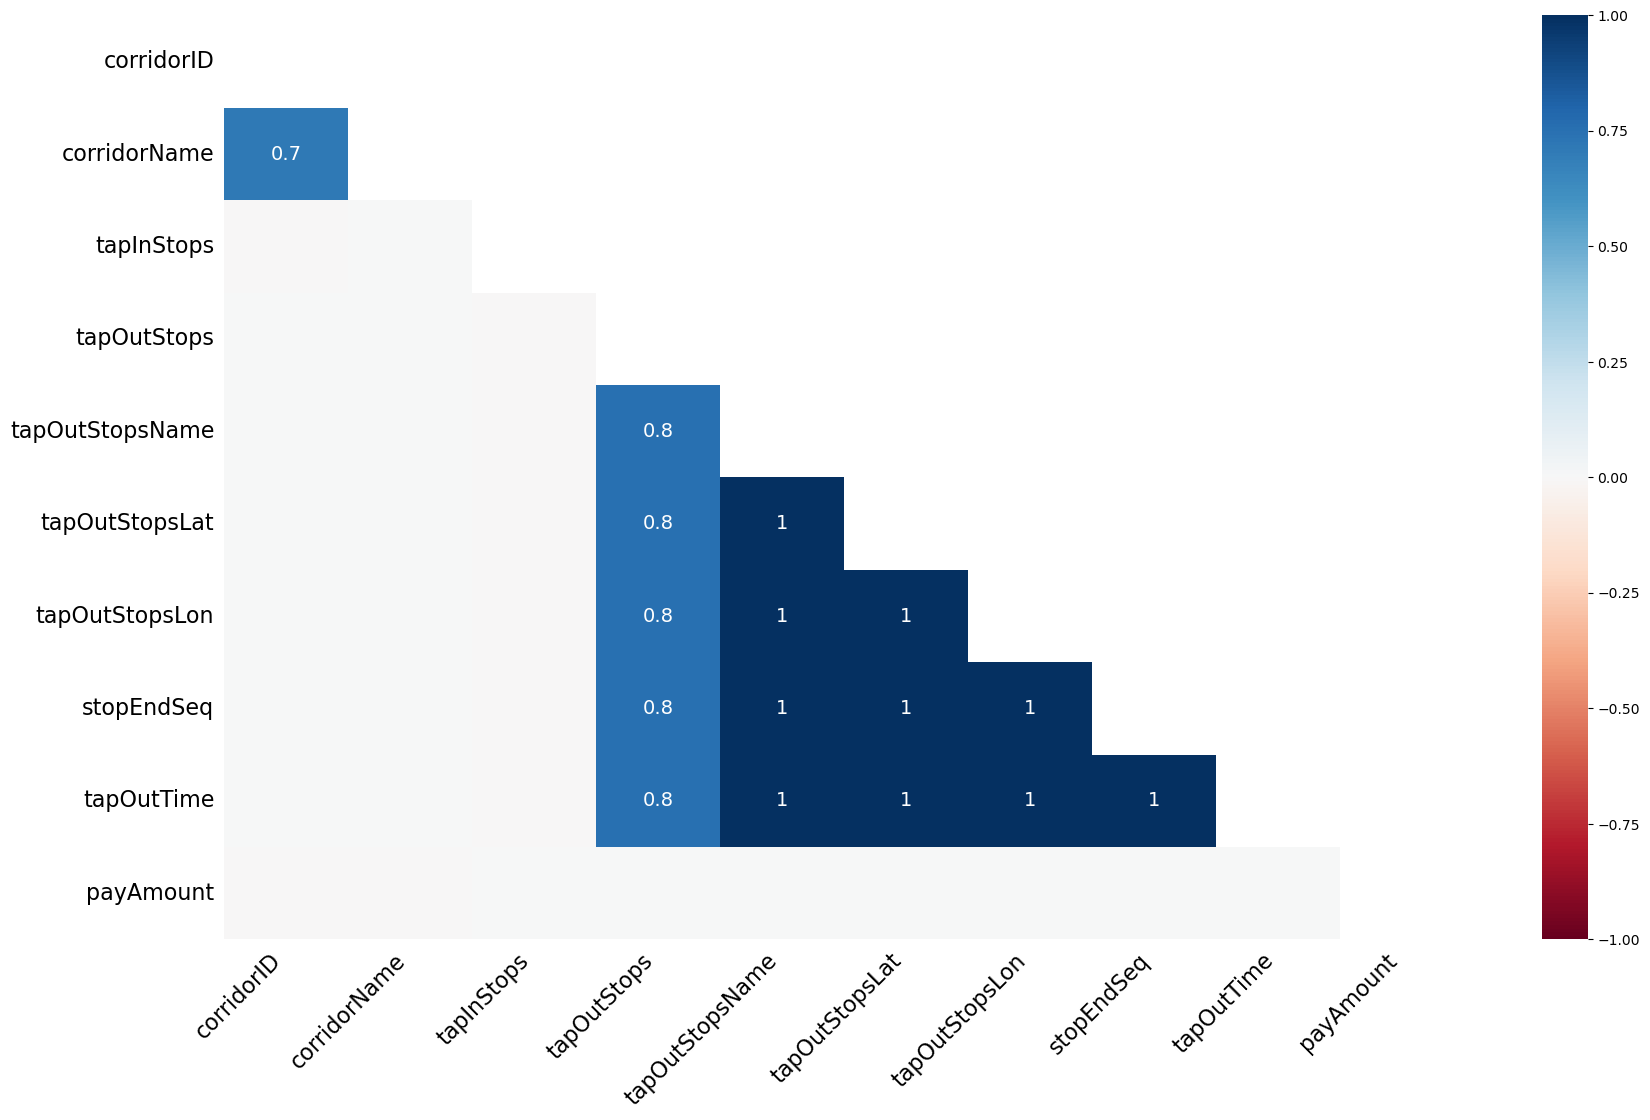

In [6]:
msno.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])

Heatmap tersebut menunjukkan adanya pola korelasi kuat antar kolom yang memiliki data hilang (missing values). Terlihat bahwa kolom-kolom terkait tap-out seperti `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki korelasi sempurna (1.0), yang berarti jika satu kolom hilang, kolom lainnya juga kemungkinan besar hilang secara bersamaan. Kolom `tapOutStops` juga memiliki korelasi tinggi (0.8) dengan grup tersebut, sehingga kemungkinan besar juga ikut hilang. Selain itu, kolom `corridorID` dan `corridorName` memiliki korelasi sedang (0.7), menunjukkan adanya kecenderungan hilang bersamaan. Sementara itu, kolom seperti `tapInStops` dan `payAmount` tidak menunjukkan korelasi signifikan dengan kolom lainnya dalam hal missing values. Pola ini mengindikasikan bahwa sebagian besar data hilang terjadi secara berkelompok, khususnya pada informasi tap-out, kemungkinan karena pengguna tidak melakukan tap-out atau sistem gagal merekamnya.


**Handling Missing Value** 

Bagamana cara kita menghandling missing values yang ada? ada dua cara yaitu menghapus kolom tersebut, atau mengisi data yang hilang. Pada kasus ini kita akan mencoba mengisi kolom yang kosong dengan menggunakan kesesuaian antar kolom dengan nilai yang paling mendekati dan rasional, apabila masih terdapat missing value setelah dilakukan penyesuaian maka kita akan menghapusnya

Missing Value `payAmount`

Missing value pada kolom `payAmount` sekitar 2,6%. Adapun untuk menghandel missing value tersebut diisi berdasarkan `corridorID`. Karena koridor perjalanan memiliki nilai `payAmount` yang konsisten. contoh koridor untuk layanan royaltrans memiliki nilai `payAmaount` yang konsisten yaitu 20000. Pendekatan ini bertujuan untuk memanfaatkan pola konsistensi tersebut untuk mengisi nilai yang kosong dengan lebih akurat. .

In [7]:
payAmount_corridorID= pd.crosstab(df['corridorID'], df['payAmount'])
payAmount_corridorID

payAmount,0.0,3500.0,20000.0
corridorID,,,
1,0,236,0
10,0,101,0
10A,147,0,0
10B,139,0,0
10D,0,164,0
...,...,...,...
S21,0,388,0
S22,0,136,0
S31,0,0,151


In [8]:
def fill_pay_amount(row):
    if row['corridorID'] in ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']:
        return 20000
    elif row['corridorID'] in ['10A', '10B', '11B', '11C', '11K', '11M', '11N', '11P', '12C', '12F', '2E', '2F', '2H', '3A', '3B', '3C', '4E', '9F', 'BW9', 'JAK']:
        return 3500
    else:
        return 0

df['payAmount'] = df.apply(lambda row: fill_pay_amount(row) if pd.isna(row['payAmount']) else row['payAmount'], axis=1)


Missing Value `'corridorID'` 

Kita akan menggunakan operasi groupby dengan transform untuk membuat kolom baru yang berisi mode dari `'corridorID'` untuk setiap kelompok unik `'corridorName'`.

In [9]:
corridorIDmode= df.groupby('corridorName')['corridorID'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
corridorIDmode

,corridorName,corridorID
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `'corridorIDmode'` menjadi kamus `'corridor_id_mapping'`. Dalam kamus ini,`'corridorName'` berfungsi sebagai kunci, dan nilai dari `'corridorID'` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `'corridorName'` dari `'corridorID'` yang memiliki nilai kosong.

In [10]:
corridor_id_maping = df.dropna(subset=['corridorID'])
corridor_id_maping = corridor_id_maping[['corridorName', 'corridorID']].drop_duplicates().set_index('corridorName')['corridorID']
corridor_id_maping

corridorName
Matraman Baru - Ancol                            5
Stasiun Tebet - Karet via Patra Kuningan        6C
Pantai Maju - Kota                             R1A
Pulo Gebang - Pulo Gadung 2 via PIK            11D
Tanjung Priok - Pluit                           12
                                             ...  
NaN                                             8A
NaN                                         JAK.71
NaN                                            12F
NaN                                         JAK.12
NaN                                             2Q
Name: corridorID, Length: 424, dtype: object

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `'corridorID'` berdasarkan `'corridorName'` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `'corridorID'` dengan `'corridorName'` tidak ditemukan (NaN), maka imputasi nilai dari `'corridorID'` akan dilewati ke baris berikutnya.

In [11]:
def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return corridor_id_maping.get(row['corridorName'])
    return row['corridorID']

df['corridorID'] = df.apply(fill_missing_corridor_id, axis=1)

In [12]:
df['corridorID'].isnull().sum()

np.int64(1125)

Setelah melakukan imputasi nilai `'corridorID'`, masih tersisa 1125 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `'corridorID'` selain menggunakan informasi dari kolom `'corridorName'`.

Missing Value CorridorName

Kita akan menggunakan operasi groupby dengan transform untuk membuat kolom baru yang berisi mode dari `'corridorName'` untuk setiap kelompok unik `'corridorID'`.

In [13]:
corridorname_id = df.groupby('corridorName')['corridorID'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index(name='corridorIDmode')
corridorname_id

,corridorName,corridorIDmode
0,Andara - Stasiun Universitas Pancasila,JAK.44
1,BKN - Blok M,M7B
2,BSD - Jelambar,S11
3,BSD Serpong - Fatmawati,S12
4,Batusari - Grogol,8K
...,...,...
211,Terminal Rawamangun - Cipinang Muara,JAK.74
212,Terminal Tanah Merah - Pulo Gadung,JAK.112
213,Terminal Tanjung Priok - Ancol Barat,JAK.88
214,Tongtek - Tebet Eco Park (TEP) - Cililitan,JAK.43B


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `'corridorname_id'` menjadi kamus `'corridor_Name_maping_reverse'`. Dalam kamus ini, `'corridorID'` berfungsi sebagai kunci, dan nilai dari `'corridorName'` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `'corridorID'` dengan `'corridorName'` yang memiliki nilai kosong.

In [14]:
corridor_id_maping_mode = corridor_id_maping.reset_index().set_index('corridorID')['corridorName'].to_dict()
corridor_id_maping_mode

{'5': nan,
 '6C': nan,
 'R1A': nan,
 '11D': nan,
 '12': nan,
 '1T': nan,
 'JAK.18': 'Kalibata - Kuningan',
 'B14': nan,
 '1Q': nan,
 '5M': nan,
 'M7B': nan,
 '9A': nan,
 '4': nan,
 'JAK.46': nan,
 'S22': nan,
 '13': nan,
 '9E': nan,
 'M9': nan,
 'JAK.88': nan,
 'T11': nan,
 'JAK.16': nan,
 '6V': nan,
 '11Q': nan,
 'JAK.02': nan,
 '11': 'Pulo Gebang - Matraman',
 '1C': nan,
 '3B': nan,
 'M1': nan,
 '7E': nan,
 '1P': nan,
 '7D': nan,
 '6H': nan,
 '14': nan,
 'BW9': nan,
 'JIS3': nan,
 '2': 'Pulo Gadung - Monas',
 'JAK.15': nan,
 '6N': nan,
 'M11': nan,
 'JAK.112': nan,
 '9N': nan,
 'JAK.43B': nan,
 'JAK.42': nan,
 '7P': nan,
 'JAK.36': nan,
 '13B': nan,
 'JAK.06': nan,
 'JAK.14': nan,
 'M7': nan,
 'T21': 'Palem Semi - Bundaran Senayan',
 '12A': 'Pelabuhan Kaliadem - Kota',
 '9D': nan,
 '1': nan,
 '3A': nan,
 '3C': nan,
 'M8': nan,
 'B21': nan,
 'JAK.71': nan,
 'JAK.77': nan,
 'M3': 'Kalideres - Bundaran HI via Veteran',
 'JAK.44': nan,
 'JAK.48B': nan,
 '8K': nan,
 'JAK.19': nan,
 'M10':

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `'corridorName'` berdasarkan `'corridorID'` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `'corridorName'` dengan `'corridorID'` tidak ditemukan (NaN), maka imputasi nilai dari `'corridorName'` akan dilewati ke baris berikutnya.

In [15]:
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_id_maping_mode.get(row['corridorID'])
    return row['corridorName']

df['corridorName'] = df.apply(fill_missing_corridor_name, axis=1)

In [16]:
df['corridorName'].isnull().sum()

np.int64(1896)

Setelah melakukan imputasi nilai `'corridorName'`, masih tersisa 1125 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `'corridorName'` selain menggunakan informasi dari kolom `'corridorID'`.

Missing Value TapInStops

In [17]:
tapInStops_mode = df.groupby('tapInStopsName')['tapInStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapInStops_mode

,tapInStopsName,tapInStops
0,18 Office Park,B00001P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,AKR Tower,B00018P
4,ASEAN,P00004
...,...,...
2597,Yayasan Nurul Ihsan Pulo Gebang,B05926P
2598,Yayasan Perguruan Rakyat 2,B05929P
2599,Yon Arhanud - 10 Pesanggrahan,B05933P
2600,Yos Sudarso Kodamar,P00274


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `tapInStops_mode` menjadi kamus `tapInStops_mapping`. Dalam kamus ini, `tapInStopsName` berfungsi sebagai kunci, dan nilai dari `tapInStops` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `tapInStops` yang memiliki nilai kosong dengan `tapInStopsName`.

In [18]:
tapInStops_mapping = df.dropna(subset=['tapInStops', 'tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()
tapInStops_mapping

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapStoInps` berdasarkan `tapInStopsName` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `tapInStops` dengan `tapInStopsName` tidak ditemukan (NaN), maka proses imputasi nilai `tapInStops` akan dilanjutkan ke baris berikutnya.

In [19]:
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInStops_mapping))

In [20]:
df['tapInStops'].isnull().sum()

np.int64(34)

Setelah melakukan imputasi nilai `tapInStops`, masih tersisa 34 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `tapInStops` selain menggunakan informasi dari kolom `tapInStopsName`.


Missing Value tapOutStop

In [21]:
tapOutStops_mode = df.groupby('tapOutStopsName')['tapOutStops'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
tapOutStops_mode

,tapOutStopsName,tapOutStops
0,ABA,B00002P
1,ACC Simatupang,B00004P
2,ACE Hardware,B00005P
3,ASEAN,P00004
4,ASMI,P00005
...,...,...
2243,Yayasan Perguruan Rakyat 2,B05929P
2244,Yon Arhanud - 10 Pesanggrahan,B05933P
2245,Yos Sudarso Kodamar,P00274
2246,Yos Sudarso Kodamar 1,B05934P


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `tapOutStops_mode` menjadi kamus `tapOutStops_mapping`. Dalam kamus ini, `tapOutStopsName` berfungsi sebagai kunci, dan nilai dari `tapOutStops` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `tapOutStops` yang memiliki nilai kosong dengan `tapOutStopsName`.

In [22]:
tapOutStops_mapping = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()
tapOutStops_mapping

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `tapOutStops` berdasarkan `tapOutStopsName` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `tapOutStops` dengan `tapOutStopsName` tidak ditemukan (NaN), maka proses imputasi nilai `tapOutStops` akan dilanjutkan ke baris berikutnya.

In [23]:
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutStops_mapping))

In [24]:
df['tapOutStops'].isnull().sum()

np.int64(1363)

Setelah melakukan imputasi nilai `tapOutStops`, masih tersisa 1363 nilai yang hilang. Kita dapat menghapus data ini karena tidak ada kolom lain yang dapat digunakan untuk pemetaan atau mengisi nilai kolom `tapOutStops` selain menggunakan informasi dari kolom `tapOutStopsName`.

Missing value stopEndSeq

In [25]:
stopEndSeq_mode = df.groupby('stopStartSeq')['stopEndSeq'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index()
stopEndSeq_mode

,stopStartSeq,stopEndSeq
0,0,1.0
1,1,2.0
2,2,3.0
3,3,5.0
4,4,6.0
...,...,...
62,63,66.0
63,64,66.0
64,65,73.0
65,66,68.0


Pada tahap ini, kita mengonversi dua kolom dari DataFrame `stopEndSeq_mode` menjadi kamus `stopEndSeq_mapping_df`. Dalam kamus ini, `stopEndSeq_mapping_df` berfungsi sebagai kunci, dan nilai dari `stopEndSeq` yang paling sering muncul menjadi nilainya. Hal ini dilakukan untuk menyelaraskan `stopEndSeq` yang memiliki nilai kosong dengan `stopStartSeq`.

In [26]:
stopEndSeq_mapping_df = df.dropna(subset=['stopStartSeq', 'stopEndSeq']).drop_duplicates(subset=['stopStartSeq']).set_index(['stopStartSeq'])['stopEndSeq']
stopEndSeq_mapping_df

stopStartSeq
7     12.0
13    21.0
38    39.0
23    29.0
5     15.0
      ... 
66    68.0
55    58.0
59    62.0
53    54.0
68    69.0
Name: stopEndSeq, Length: 67, dtype: float64

Selanjutnya, kita akan menggantikan nilai yang hilang pada setiap baris dalam `stopEndSeq` berdasarkan `stopStartSeq` yang telah kita buat pada langkah sebelumnya. Jika penyesuaian nilai dari `stopEndSeq` dengan `stopStartSeq` tidak ditemukan (NaN), maka proses imputasi nilai `stopEndSeq` akan dilanjutkan ke baris berikutnya.

In [27]:
df['stopEndSeq'] = df.apply(lambda row: stopEndSeq_mapping_df.get(row['stopStartSeq'], row['stopEndSeq']), axis=1)

In [28]:
df['stopEndSeq'].isnull().sum()

np.int64(0)

Setelah melakukan imputasi pada kolom `stopStartSeq`, nilai yang sebelumnya hilang pada kolom `stopEndSeq` berhasil dihapus.

In [29]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1896
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

Setelah mengisi missing value, ternyata masih terdapat beberapa sisa nilai yang hilang. Missing value yang tidak terisi ini disebabkan karena kolom tidak memenuhi syarat aturan, yaitu hanya dapat dilakukan pengisian dengan metode pemetaan apabila kolom yang dijadikan acuan tidak memiliki nilai yang kosong. Oleh karena itu, baris dengan nilai yang kosong selanjutnya akan dihapus.

In [30]:
df = df.dropna(subset=['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','tapOutTime'])

In [31]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

# **Menambah Kolom Baru**

**Hour**

In [32]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

**Day**

In [33]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek
tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['tapInDay'] = df['tapInDay'].map(tapInDay)

**Week**

In [34]:
df["tapInWeek"] =df['tapOutTime'].dt.strftime('%d')

**Age**

In [35]:
df['age'] = 2023 - df['payCardBirthDate']

def category_age(age):
    if 0 <= age <= 12:
        return 'anak-anak'
    elif 13 <= age <= 19:
        return 'remaja'
    elif 20 <= age <= 39:
        return 'dewasa awal'
    elif 40 <= age <= 59:
        return 'dewasa akhir'
    else:
        return 'Lansia'

df['ageGroup'] = df['age'].apply(category_age)

**JenisLayanan**

In [36]:
df['payAmount'] = df['payAmount'].astype('int64')

In [37]:
def trans_type(payAmount):
    if payAmount == 20000:
        return 'RoyalTrans'
    elif payAmount == 3500:
        return 'Regular Tj'
    else:
        return 'JakLingko'

df['transType'] = df['payAmount'].apply(trans_type)

df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,tapInWeek,age,ageGroup,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,12.0,2023-04-03 06:00:53,3500,5,6,Monday,03,15,remaja,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,21.0,2023-04-03 06:40:01,3500,5,6,Monday,03,26,dewasa awal,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,39.0,2023-04-03 06:50:55,3500,5,6,Monday,03,31,dewasa awal,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,29.0,2023-04-03 06:28:16,3500,5,6,Monday,03,45,dewasa akhir,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,15.0,2023-04-03 06:57:03,3500,6,6,Monday,03,41,dewasa akhir,Regular Tj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,12.0,2023-04-21 19:55:49,3500,18,19,Friday,21,19,remaja,Regular Tj
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,16.0,2023-04-18 22:28:22,3500,21,22,Tuesday,18,49,dewasa akhir,Regular Tj
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,14.0,2023-04-04 13:27:25,20000,10,13,Tuesday,04,47,dewasa akhir,RoyalTrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,40.0,2023-04-15 20:27:50,0,19,20,Saturday,15,47,dewasa akhir,JakLingko


# **Analisis Data**

Tujuan menganalisis profil pengguna Transjakarta adalah untuk mendapatkan pemahaman mengenai karakteristik perilaku pengguna yang menggunakan layanan tersebut. Analisis tersebut dilakukan dengan fokus pada dua aspek utama: gender dan kelompok usia. 

`- Bagaimana proporsi pengguna Transjakarta berdasarkan gender?`

`- Bagaimana persebaran usia pengguna Transjakarta?`

**Proporsi pengguna TransJakarta berdasarkan Gender**

In [38]:
gender_tj = pd.DataFrame(df['payCardSex'].value_counts().reset_index())
gender_tj

,payCardSex,count
0,F,18482
1,M,16204


**Visualisasi Pie Chart**

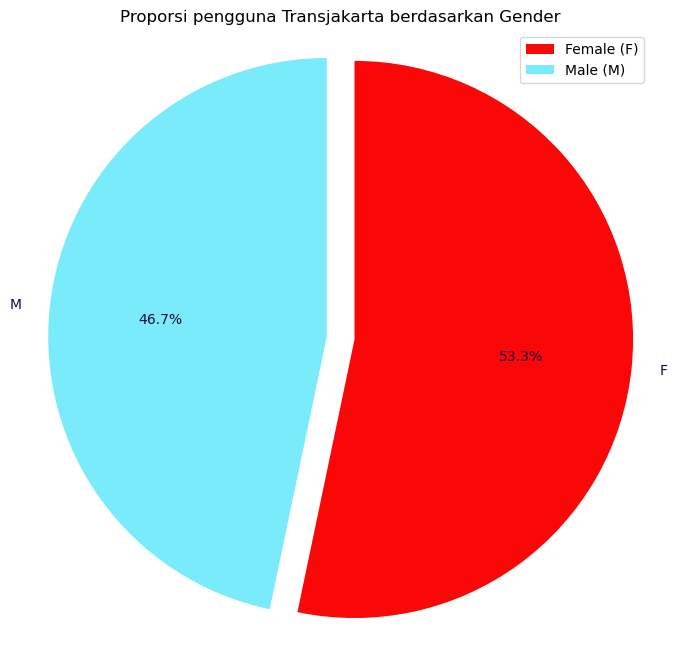

In [39]:
plt.figure(figsize=(8,8))
plt.pie(gender_tj['count'],
        labels=gender_tj['payCardSex'],
        autopct='%.1f%%',
        colors=["#FA0707","#7AEBFA"],
        startangle=90,
        counterclock=False,
        explode=[0.1,0],
        textprops={'color':'#170845'})
plt.axis('equal')
plt.legend(['Female (F)', 'Male (M)'], loc='upper right')
plt.title('Proporsi pengguna Transjakarta berdasarkan Gender')
plt.show()

Berdasarkan diagram pie diatas, pengguna TransJakarta perempuan lebih banyak 6,4 % jika dibandingkan dengan pengguna TransJakarta dengan gender Laki-laki, meskipun tidak ada perbedaan yang signifikan, namun perlu diingat, kebijakan inklusif armada khusus wanita tampak nya masih relevan mengingat TransJakarta selalu memberikan kepuasan dan kenyaman pelanggan agar tidak terjadi hal hal yang tidak diinginkan.

**Persebaran Usia Pengguna TransJakarta**

In [40]:
age_tj = pd.DataFrame(df['ageGroup'].value_counts().reset_index())
age_tj

,ageGroup,count
0,dewasa awal,18169
1,dewasa akhir,9347
2,remaja,5061
3,anak-anak,1414
4,Lansia,695


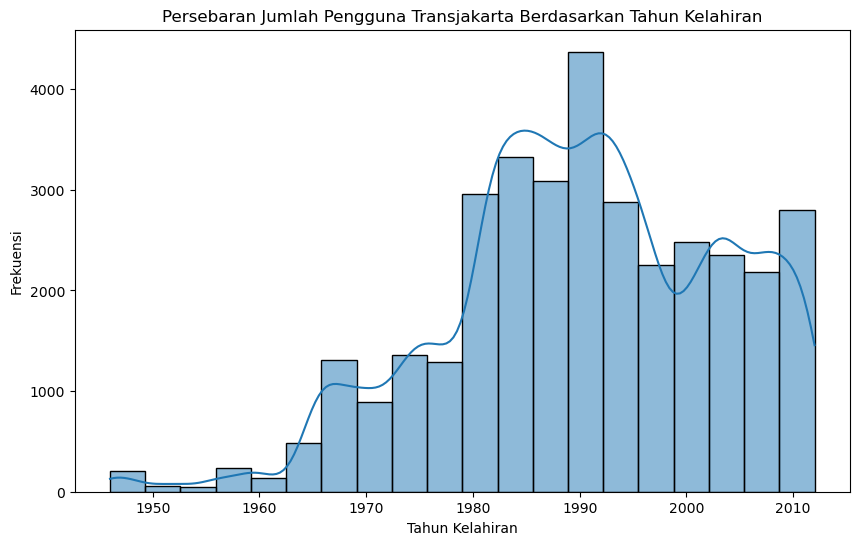

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(x='payCardBirthDate', data=df, bins=20, kde=True)

plt.title('Persebaran Jumlah Pengguna Transjakarta Berdasarkan Tahun Kelahiran')
plt.xlabel('Tahun Kelahiran') 
plt.ylabel('Frekuensi') 

plt.show()

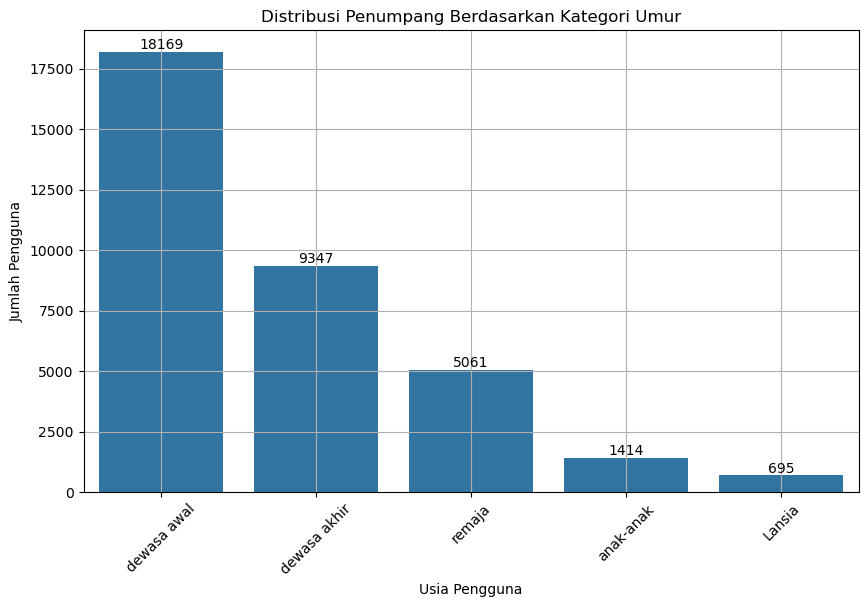

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='ageGroup', y='count', data=age_tj)

for i, v in enumerate(age_tj['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.grid()
plt.xlabel('Usia Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Penumpang Berdasarkan Kategori Umur')
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik distribusi penumpang berdasarkan kategori umur, dapat disimpulkan bahwa kelompok usia **dewasa awal** (sekitar usia 20–35 tahun) merupakan pengguna transportasi terbanyak dengan jumlah **18.169 orang**, diikuti oleh kelompok **dewasa akhir** (sekitar usia 36–50 tahun) sebanyak **9.347 orang**. Kelompok **remaja** menempati posisi ketiga dengan **5.061 pengguna**, sementara kelompok **anak-anak** dan **lansia** memiliki jumlah yang jauh lebih sedikit, masing-masing **1.414** dan **695 pengguna**. Insight penting dari data ini menunjukkan bahwa layanan transportasi lebih banyak digunakan oleh kelompok usia produktif, terutama dewasa awal, yang kemungkinan besar merupakan pekerja atau mahasiswa. Oleh karena itu, strategi peningkatan layanan dan promosi sebaiknya difokuskan pada kebutuhan kelompok usia produktif ini, seperti peningkatan kenyamanan saat jam sibuk. Di sisi lain, rendahnya jumlah penumpang dari kelompok lansia dan anak-anak juga bisa menjadi perhatian, mungkin karena keterbatasan aksesibilitas atau keamanan, sehingga penyedia layanan dapat mempertimbangkan pengembangan fasilitas yang lebih ramah bagi kelompok usia tersebut.

## 2. Pola Perjalanan Berdasarkan profil pengguna TransJakarta

Setelah menganalisis proporsi dan persebaran pengguna Tj berdasarkan gender dan usia, serta memahami urgensi kedua profil pengguna tersebut.
pihak Transjakarta dapat prioritaskan perbaikan, penambahan fasilitas dan menyesuaikan fasilitas di area operasional. Hal ini mencakup penempatan fasilitas yang lebih aman, nyaman, dan sesuai dengan kebutuhan khusus masing-masing kelompok pengguna, seperti penumpang perempuan, anak-anak, atau lansia. Dengan menganalisis pola perjalanan berdasarkan profil pengguna Transjakarta dapat membantu menciptakan layanan transportasi Transjakarta yang lebih responsif, aman, dan nyaman, sehingga dapat meningkatkan kepuasan pengguna dan efektivitas sistem secara keseluruhan.

* Koridor manakah yang sering digunakan oleh penumpang berdasarkan gender khususnya  perempuan?`

* Koridor manakah yang sering digunakan oleh penumpang berdasarkan kategori usia khususnya anak-anak?`

* Koridor manakah yang sering digunakan oleh penumpang berdasarkan kategori usia khususnya lansia?`


**Koridor yang sering digunakan oleh perempuan**

In [ ]:
female_tj= df[df['payCardSex'] == 'F']

In [ ]:
female_tj_corridor = female_tj['corridorName'].value_counts().reset_index()
female_tj_corridor = female_tj_corridor.sort_values(by='count', ascending=False).head(5)
female_tj_corridor

,corridorName,count
0,Pasar Minggu - Tanah Abang,213
1,Poris Plawad - Bundaran Senayan,211
2,Rusun Rawa Bebek - Kodamar,205
3,Terminal Tanah Merah - Pulo Gadung,195
4,Cilangkap - Cililitan,187


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26496\1871059618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridorName', y='count', data=female_tj_corridor , palette='coolwarm')


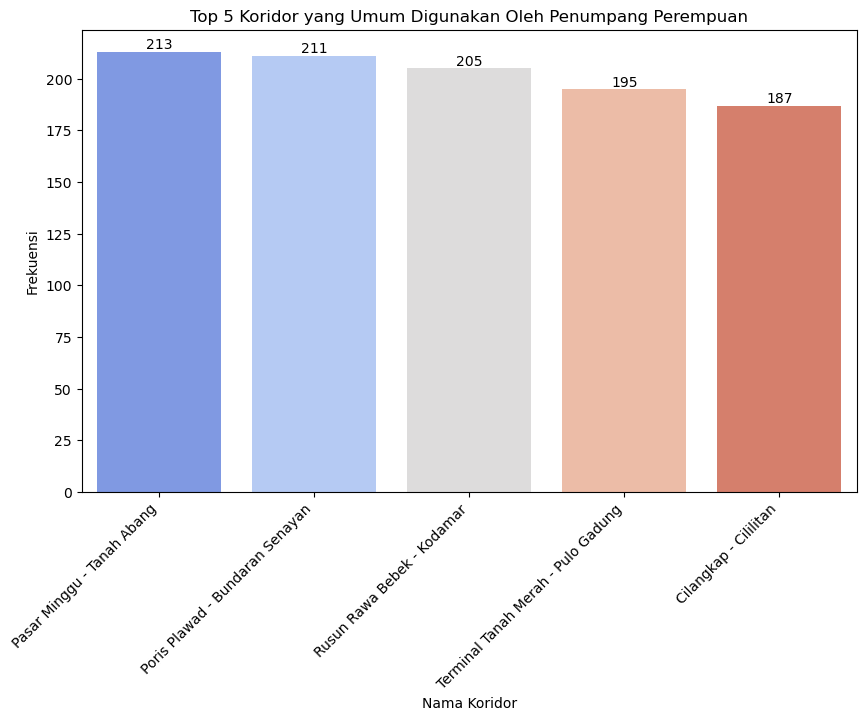

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='corridorName', y='count', data=female_tj_corridor , palette='coolwarm')  

plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')
plt.title('Top 5 Koridor yang Umum Digunakan Oleh Penumpang Perempuan')

for i, v in enumerate(female_tj_corridor['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan grafik “Top 5 Koridor yang Umum Digunakan oleh Penumpang Perempuan”, terlihat bahwa koridor **Pasar Minggu–Tanah Abang**, **Poris Plawad–Bundaran Senayan**, dan **Rusun Rawa Bebek–Kodamar** memiliki frekuensi tertinggi, diikuti oleh **Terminal Tanah Merah–Pulo Gadung** dan **Cilangkap–Cililitan**. Pola ini menunjukkan bahwa perempuan banyak memanfaatkan transportasi publik untuk aktivitas ekonomi dan sosial, terutama pada rute yang menghubungkan kawasan perumahan dengan pusat kota atau area komersial. Temuan ini juga mengindikasikan pentingnya penyediaan fasilitas yang ramah dan aman bagi perempuan, seperti area tunggu yang terang, petugas keamanan, dan akses yang nyaman bagi pengguna rentan seperti lansia dan anak-anak. Selain itu, koridor dengan tingkat mobilitas perempuan tinggi dapat menjadi prioritas untuk implementasi konsep **transportasi inklusif**, yang tidak hanya mendukung keamanan dan kenyamanan, tetapi juga memperhatikan kebutuhan mobilitas berbasis gender dan usia secara berkelanjutan.


**Koridor yang sering digunakan anak-anak**

In [ ]:
child_tj = df[df['ageGroup'] == 'anak-anak']

In [ ]:
child_tj_corridor = child_tj['corridorName'].value_counts().reset_index()
child_tj_corridor=child_tj_corridor.sort_values(by='count', ascending=False).head()
child_tj_corridor

,corridorName,count
0,Kampung Rambutan - Juanda via Pasar Baru,89
1,Pinang Ranti - Pluit,65
2,Kampung Melayu - Ragunan,42
3,Rusun Rawa Bebek - Bukit Duri,40
4,Puri Beta - Pancoran Barat,40


**Visualisasi Barplot**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26496\91606560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridorName', y='count', data=child_tj_corridor , palette='coolwarm')


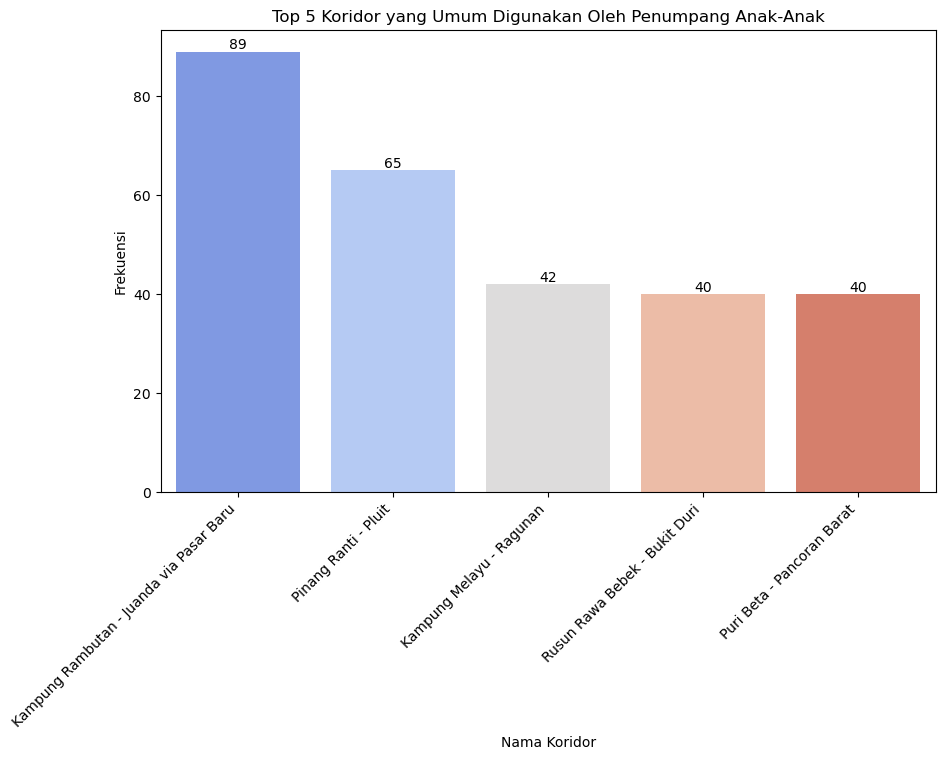

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='corridorName', y='count', data=child_tj_corridor , palette='coolwarm')  

plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')
plt.title('Top 5 Koridor yang Umum Digunakan Oleh Penumpang Anak-Anak')

for i, v in enumerate(child_tj_corridor['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')
plt.show()

Data "Top 5 Koridor yang Umum Digunakan Oleh Penumpang Anak-Anak" menunjukkan bahwa **Koridor Kampung Rambutan - Juanda via Pasar Baru** (89) adalah prioritas utama untuk peningkatan fasilitas kaum rentan, diikuti oleh **Pinang Ranti - Pluit** (65). Tingginya frekuensi ini menuntut fokus segera pada koridor tersebut untuk memastikan **keamanan, aksesibilitas, dan kenyamanan** melalui penambahan jalur dan tempat duduk prioritas di Halte dan bus, serta memastikan fungsi optimal dari *ramp* dan *lift*, demi meminimalkan risiko bagi anak-anak, lansia, dan perempuan.

**Koridor yang sering digunakan oleh lansia**

In [ ]:
lansia_tj = df[df['ageGroup'] == 'Lansia']

In [ ]:
lansia_tj_corridor = lansia_tj['corridorName'].value_counts().reset_index()
lansia_tj_corridor=lansia_tj_corridor.sort_values(by='count', ascending=False).head()
lansia_tj_corridor

,corridorName,count
0,Ragunan - Gelora Bung Karno,71
1,Blok M - Kota,38
2,Kampung Rambutan - Tanjung Priok,38
3,Lebak Bulus - Petukangan,37
4,Cibubur - BKN,37


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26496\2578129364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corridorName', y='count', data=lansia_tj_corridor , palette='coolwarm')


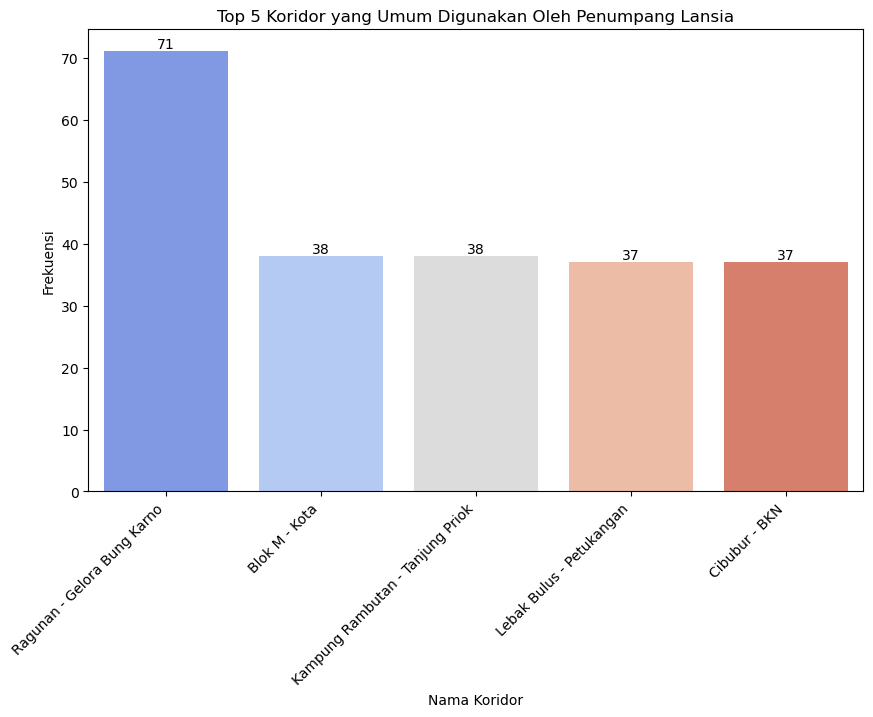

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='corridorName', y='count', data=lansia_tj_corridor , palette='coolwarm')  

plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')
plt.title('Top 5 Koridor yang Umum Digunakan Oleh Penumpang Lansia')

for i, v in enumerate(lansia_tj_corridor['count']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')


plt.xticks(rotation=45, ha='right')
plt.show()

Data penumpang lansia terbanyak menunjukan **Koridor Ragunan - Gelora Bung Karno** (71) sebagai fokus prioritas utama, dengan frekuensi yang signifikan di atas koridor lain seperti Blok M - Kota (38). Peningkatan fasilitas di koridor ini harus difokuskan pada **aksesibilitas dan keamanan fisik** lansia, mencakup pengawasan ketat fungsi *lift* dan eskalator, penjaminan lantai anti-selip di Halte dan bus, serta penyediaan tempat duduk prioritas yang kokoh dan waktu *boarding* yang lebih santai untuk meminimalkan risiko kecelakaan dan meningkatkan kenyamanan mobilitas lansia.

## **Jam Sibuk**

Optimalisasi dan efisiensi koridor tersebut memang perlu diperhatikan. Namun, agar optimalisasi menjadi lebih tepat sasaran, aspek waktu dan jam sibuk harus dimasukkan ke dalam analisis data. Permasalahan overcrowded seringkali terjadi pada jam-jam sibuk di koridor yang padat. Oleh karena itu, penting untuk mengetahui kapan waktu-waktu sibuk penggunaan Transjakarta terjadi.

**Jam sibuk Weekday**

In [ ]:
weekday_tj = df[(df['tapInDay'] != 'Saturday') | (df['tapInDay'] != 'Sunday')]

**Data tapIn dalam Jam**

In [ ]:
print(weekday_tj.groupby('tapInHour').size().reset_index(name='Jumlah'))


    tapInHour  Jumlah
0           5    3070
1           6    5339
2           7    2552
3           8    2650
4           9    2574
5          10     273
6          11     317
7          12     309
8          13     327
9          14     160
10         15     365
11         16    3075
12         17    5046
13         18    2211
14         19    2249
15         20    2208
16         21    1961


**data tapOut**

In [ ]:
print(weekday_tj.groupby('tapOutHour').size().reset_index(name='Jumlah'))


    tapOutHour  Jumlah
0            0       1
1            5     956
2            6    3275
3            7    3700
4            8    2607
5            9    2587
6           10    2322
7           11     972
8           12     304
9           13     317
10          14     291
11          15     209
12          16     311
13          17    1969
14          18    4158
15          19    3424
16          20    2249
17          21    2200
18          22    2011
19          23     823


**Line Plot**

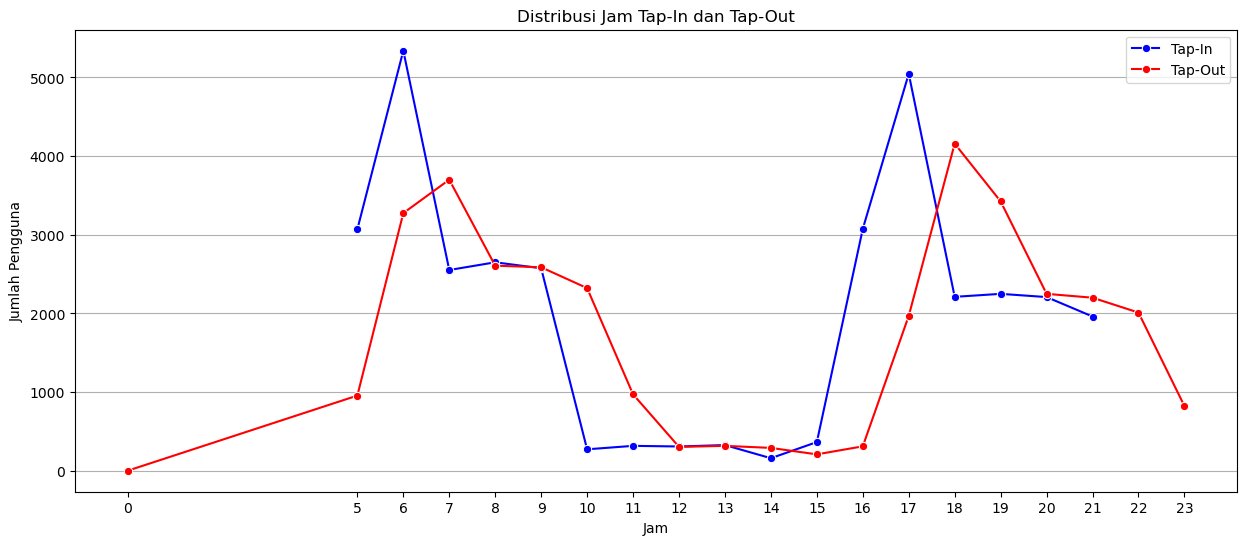

In [ ]:
plt.figure(figsize=(15, 6))

tapin_count = weekday_tj['tapInHour'].value_counts().sort_index()
sns.lineplot(x=tapin_count.index, y=tapin_count.values, color='blue', marker='o', label='Tap-In')

tapout_count = weekday_tj['tapOutHour'].value_counts().sort_index()
sns.lineplot(x=tapout_count.index, y=tapout_count.values, color='red', marker='o', label='Tap-Out')

plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.grid(axis='y')

plt.xticks(tapout_count.index)

plt.show()


Berdasarkan grafik distribusi *Tap-In* (biru) dan *Tap-Out* (merah), terlihat jelas adanya dua periode **puncak aktivitas (peak hours)** TransJakarta yang mencerminkan jam komuter: puncak pagi terjadi antara **jam 5 hingga jam 9 pagi** dengan *Tap-In* tertinggi melonjak tajam pada **jam 6 pagi** (sekitar 5300 pengguna) yang mengindikasikan keberangkatan kerja/sekolah; sementara puncak sore terjadi antara **jam 16 hingga jam 20 malam** dengan *Tap-Out* tertinggi pada **jam 18 sore** (sekitar 4200 pengguna) yang menunjukkan jam kepulangan, didahului lonjakan *Tap-In* tertinggi kedua pada **jam 17 sore** (sekitar 5000 pengguna), menyiratkan TransJakarta harus fokus pada peningkatan kapasitas armada dan pelayanan di koridor-koridor utama selama periode jam 5-9 pagi dan 16-20 sore untuk mengatasi kepadatan dan memastikan kelancaran mobilitas penumpang.

### **4. Pola Perjalanan pengguna Transjakarta di Jam Sibuk Pada Hari Kerja**

- Dari analisis waktu sibuk diatas, dapat dijadikan acuan dalam optimalisasi dan efisiensi kinerja trayek dan armada yang lebih relevan.

- Setelah memahami puncak aktivitas penggunaan Transjakarta, langkah berikutnya adalah menganalisis koridor dan halte mana yang banyak diakses selama periode puncak aktivitas, terutama pada waktu pagi dan waktu sore.

- Dengan pemahaman yang lebih mendalam tentang koridor dan halte yang ramai pada jam-jam sibuk ini, kita dapat mengidentifikasi pola perjalanan penumpang dengan lebih akurat. Informasi ini tidak hanya berguna sebagai evaluasi untuk optimalisasi armada, tetapi juga sebagai landasan strategis dalam mengatasi masalah kepadatan penumpang di berbagai titik layanan Transjakarta. Oleh karena itu, beberapa bahan pertimbangan evaluasi yang dapat diterapkan meliputi:

    - Melihat koridor terpadat di jam sibuk untuk melakukan efisiensi armada dengan cara memindahkan armada dari koridor yang kurang padat ke tempat yang lebih ramai.
    - Merevitalisasi halte yang mungkin menyebabkan kepadatan penumpang tinggi, sehingga jika penumpang harus menunggu, mereka tidak berdesakan dan tetap merasa nyaman.

- Pengetahuan ini menjadi kunci untuk meningkatkan efisiensi operasional dan memberikan pengalaman perjalanan yang lebih baik bagi pengguna layanan Transjakarta. Dengan demikian, analisis pola perjalanan pada jam sibuk bukan hanya tentang memahami kebiasaan pengguna, tetapi juga merupakan langkah nyata untuk meningkatkan kualitas layanan transportasi umum di Jakarta.


**koridor mana yang sering digunakan pada waktu sibuk?**

In [ ]:
def peak_hour_time(cols):
    if 5 <= cols <= 9:
        return 'Peak hour Morning'
    elif 16 <= cols <= 21:
        return 'Peak hour Afternoon'
    else:
        return 'Off peak hour'

df['weekday_tj'] = df['tapInHour'].apply(peak_hour_time)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26496\1248426568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday_tj'] = df['tapInHour'].apply(peak_hour_time)


**Peak hour morning (05:00 -09:00)**

In [ ]:
peak_hour_morn_corr = df[df['weekday_tj'] == "Peak hour Morning"].groupby(['corridorName']).size().reset_index(name='Count')
peak_hour_morn_corr = peak_hour_morn_corr.sort_values(by='Count', ascending=False).head(5)
peak_hour_morn_corr

,corridorName,Count
21,Cibubur - Balai Kota,187
33,Ciputat - CSW,180
116,Pulo Gadung - Monas,159
47,Harmoni - Jakarta International Stadium,158
157,Rusun Pondok Bambu - Walikota Jakarta Timur,157


**Visualisasi Bar**

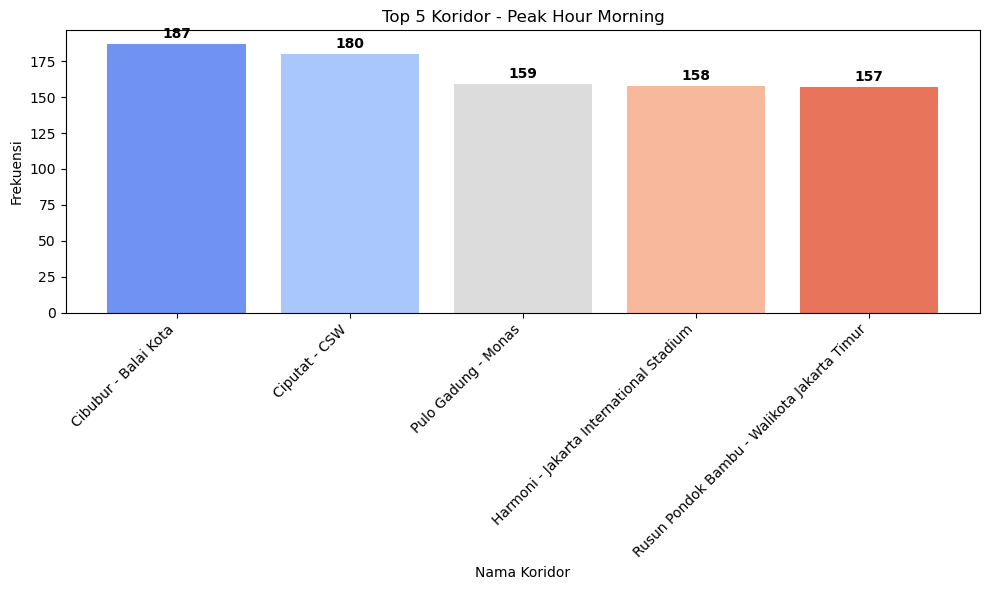

In [ ]:
plt.figure(figsize=(10,6))
custom_colors = sns.color_palette("coolwarm", len(peak_hour_morn_corr))
bars = plt.bar(peak_hour_morn_corr['corridorName'], peak_hour_morn_corr['Count'], color=custom_colors)

plt.title('Top 5 Koridor - Peak Hour Morning')
plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

**Peak hour Afternoon (16.00:21.00)**

In [ ]:
peak_hour_aftr_corr= df[df['weekday_tj'] == "Peak hour Afternoon"].groupby(['corridorName']).size().reset_index(name='Count')
peak_hour_aftr_corr= peak_hour_aftr_corr.sort_values(by='Count', ascending=False).head(5)
peak_hour_aftr_corr

,corridorName,Count
21,Cibubur - Balai Kota,183
33,Ciputat - CSW,176
47,Harmoni - Jakarta International Stadium,163
116,Pulo Gadung - Monas,163
73,Kampung Rambutan - Pondok Gede,162


**Visualisasi Barplot**

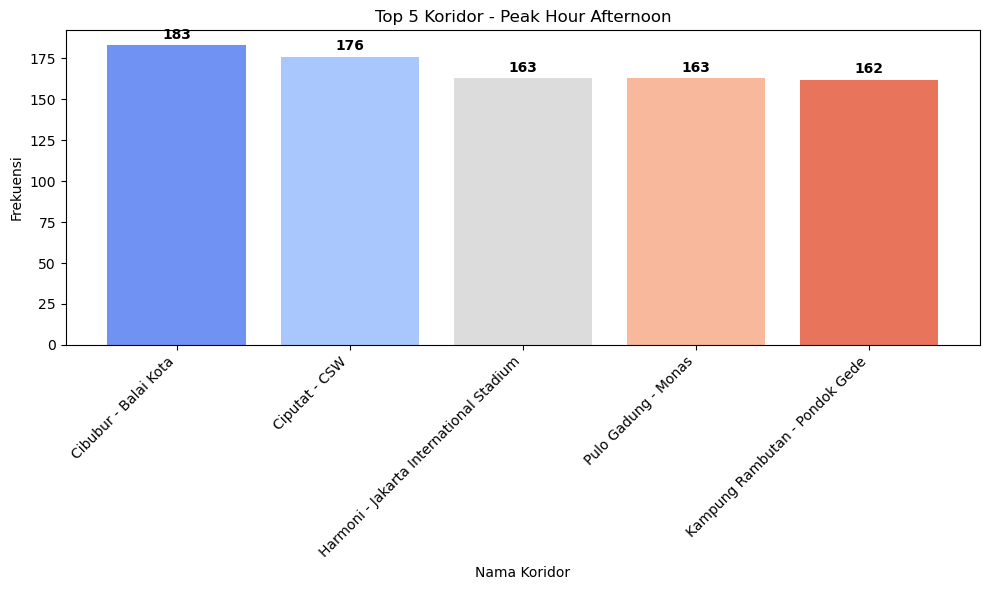

In [ ]:
plt.figure(figsize=(10,6))
custom_colors = sns.color_palette("coolwarm", len(peak_hour_aftr_corr))
bars = plt.bar(peak_hour_aftr_corr['corridorName'], peak_hour_aftr_corr['Count'], color=custom_colors)

plt.title('Top 5 Koridor - Peak Hour Afternoon')
plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

Data peak hour sore menunjukkan Koridor Cibubur - Balai Kota (183) dan Ciputat - CSW (176) sebagai prioritas utama yang membutuhkan penambahan armada dan peningkatan frekuensi keberangkatan untuk mengatasi volume kepulangan komuter yang sangat tinggi. Mengingat bahwa lima koridor teratas memiliki frekuensi yang sangat berdekatan, TransJakarta harus secara umum meningkatkan kapasitas operasional dan memastikan waktu tunggu yang pendek dan stabil di semua rute ini, termasuk Harmoni - JIS (163), Pulo Gadung - Monas (163), dan Kampung Rambutan - Pondok Gede (162), untuk meminimalkan antrian dan kepadatan di Halte selama jam sibuk sore hari.

**Halte mana saja yang sering digunakan saat jam tapIn jam sibuk?**


**Peak hour waktu pagi ((5:00 - 9:00) )**

In [ ]:
peak_hour_morntapIn = df[df['weekday_tj'] == "Peak hour Morning"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
peak_hour_morntapIn = peak_hour_morntapIn.sort_values(by='Count', ascending=False).head(5)
peak_hour_morntapIn

,tapInStops,tapInStopsName,Count
1137,P00064,Garuda Taman Mini,131
585,B03277P,Rusun Kapuk Muara,97
1212,P00170,Penjaringan,85
1236,P00202,Rawa Selatan,79
1274,P00254,Tendean,78


**Visualisasi Barplot**

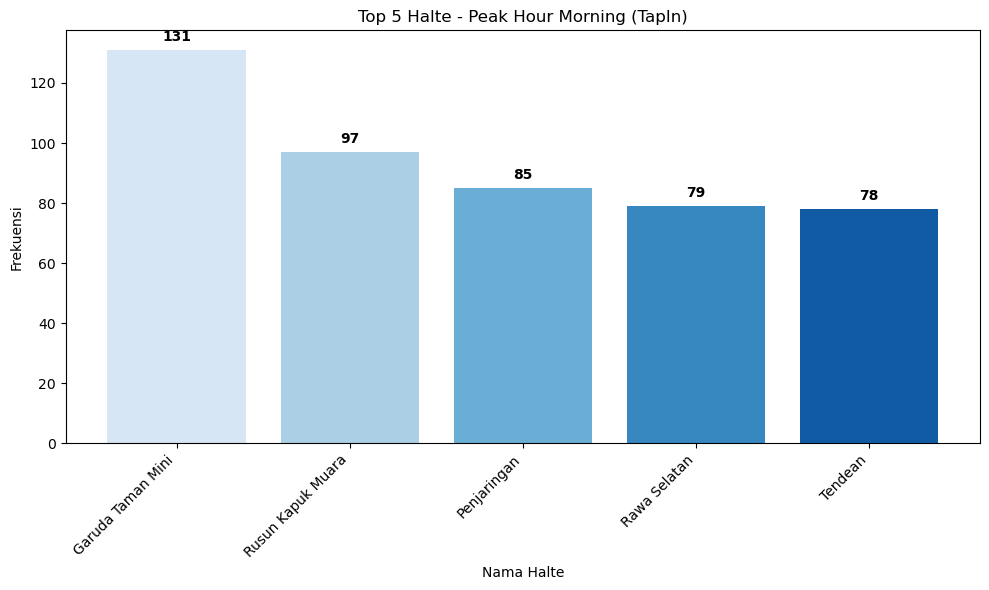

In [ ]:
plt.figure(figsize=(10,6))
custom_colors = sns.color_palette("Blues", len(peak_hour_morntapIn))
bars = plt.bar(peak_hour_morntapIn['tapInStopsName'], peak_hour_morntapIn['Count'], color=custom_colors)

plt.title('Top 5 Halte - Peak Hour Morning (TapIn)')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

**Peak hour waktu sore (16:00 - 21:00)**

In [ ]:
peak_hour_aftrtapIn = df[df['weekday_tj'] == "Peak hour Afternoon"].groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='Count')
peak_hour_aftrtapIn = peak_hour_aftrtapIn.sort_values(by='Count', ascending=False)
peak_hour_aftrtapIn.head(5)

,tapInStops,tapInStopsName,Count
1266,P00170,Penjaringan,133
63,B00248P,Cibubur Junction,96
1261,P00164,Pejaten,95
1146,P00016,BKN,93
1305,P00221,Seskoal,80


**Visualisasi Barplot**

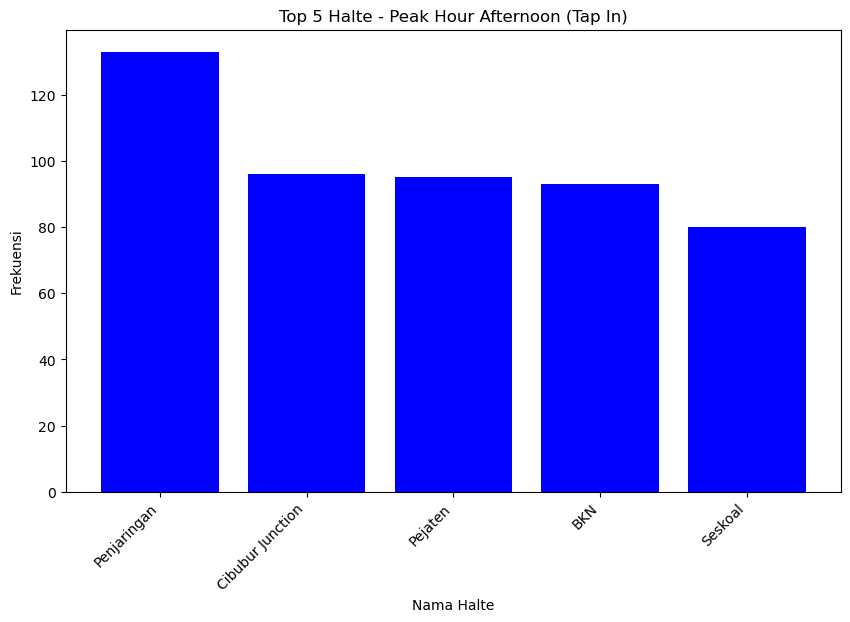

In [ ]:
peak_hour_aftrtapIn_sorted = peak_hour_aftrtapIn.sort_values(by='Count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(peak_hour_aftrtapIn_sorted['tapInStopsName'], peak_hour_aftrtapIn_sorted['Count'], color='blue')

plt.title('Top 5 Halte - Peak Hour Afternoon (Tap In)')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.show()

Data *Tap-In* *peak hour* sore menunjukkan **Halte Penjaringan** sebagai titik keberangkatan tersibuk (sekitar 130 frekuensi) yang membutuhkan perhatian segera dalam hal manajemen antrian, penambahan petugas, dan peningkatan frekuensi kedatangan bus untuk menampung volume penumpang yang sangat tinggi. Selain Penjaringan, Halte-halte komuter strategis lainnya seperti **Cibubur Junction, Pejaten, BKN, dan Seskoal** juga mengalami kepadatan signifikan (80-97 frekuensi), sehingga TransJakarta harus menerapkan strategi yang menyeluruh untuk memastikan **kecepatan *boarding* dan keamanan** di semua Halte prioritas ini selama jam sibuk sore hari.

**Halte yang sering digunakan ketika tapOut pada jam sibuk**

**Peak hour waktu pagi(05:00-09:00)**

In [ ]:
peak_hour_morntapOut = df[df['weekday_tj'] == "Peak hour Morning"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
peak_hour_morntapOut = peak_hour_morntapOut.sort_values(by='Count', ascending=False).head(5)
peak_hour_morntapOut

,tapOutStops,tapOutStopsName,Count
1097,P00170,Penjaringan,162
994,P00016,BKN,150
1073,P00137,Monas,129
1060,P00112,Kejaksaan Agung,98
1091,P00161,Pecenongan,95


**Visualisasi**

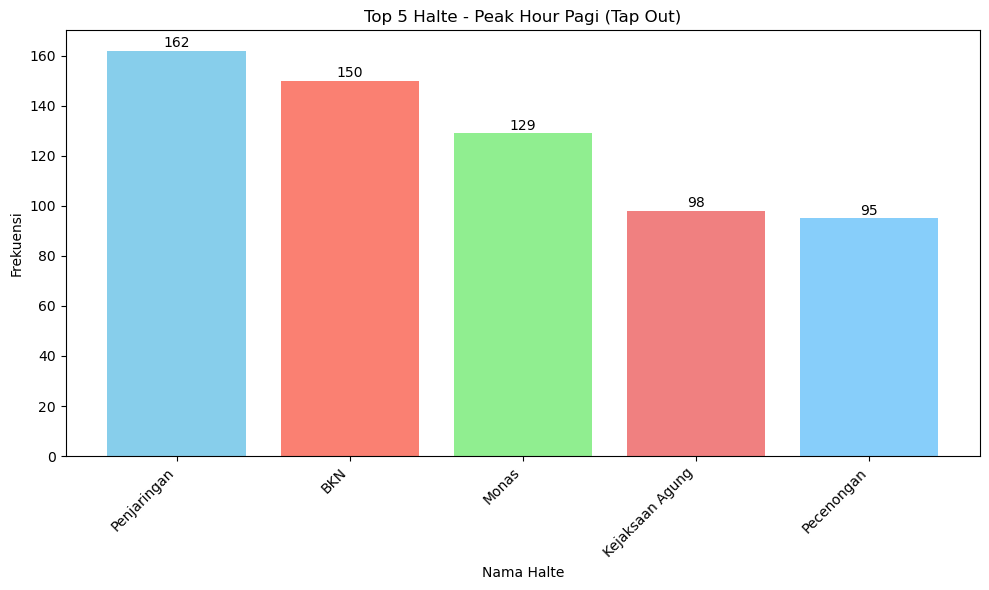

In [ ]:
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10, 6))
bars = plt.bar(peak_hour_morntapOut['tapOutStopsName'], peak_hour_morntapOut['Count'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom')

plt.title('Top 5 Halte - Peak Hour Pagi (Tap Out)')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Peak hour waktu sore (17:00-21:00)**

In [ ]:
peak_hour_aftrtapOut = df[df['weekday_tj'] == "Peak hour Afternoon"].groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='Count')
peak_hour_aftrtapOut = peak_hour_aftrtapOut.sort_values(by='Count', ascending=False).head(5)
peak_hour_aftrtapOut

,tapOutStops,tapOutStopsName,Count
890,B05725P,Term. Senen,148
1057,P00016,BKN,137
1170,P00179,Pinang Ranti,117
881,B05708P,Term. Kampung Rambutan,98
547,B03277P,Rusun Kapuk Muara,92


**Visualisasi Barplot**

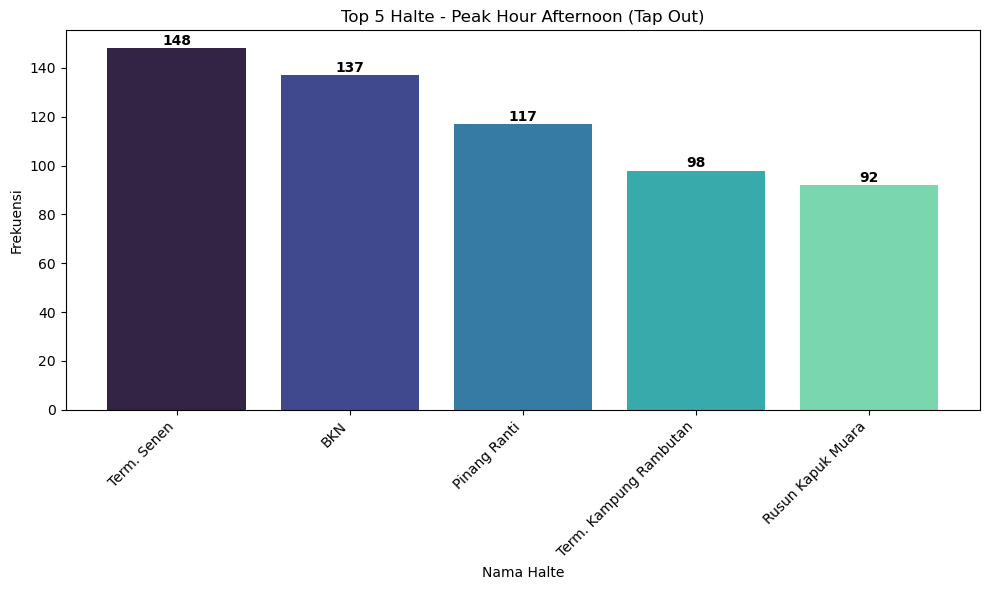

In [ ]:
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("mako", len(peak_hour_aftrtapOut))
bars = plt.bar(peak_hour_aftrtapOut['tapOutStopsName'], peak_hour_aftrtapOut['Count'], color=custom_colors)

plt.title('Top 5 Halte - Peak Hour Afternoon (Tap Out)')
plt.xlabel('Nama Halte')
plt.ylabel('Frekuensi')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data *Tap-Out* *peak hour* sore menunjukkan **Terminal Senen (148)** dan **BKN (137)** sebagai dua Halte *drop-off* atau transfer utama yang membutuhkan perhatian maksimal pada manajemen aliran penumpang *Tap-Out* dan integrasi moda transportasi, karena menampung volume kepulangan tertinggi. Meskipun **Pinang Ranti (117), Terminal Kampung Rambutan (98), dan Rusun Kapuk Muara (92)** juga penting, TransJakarta harus memprioritaskan peningkatan jumlah gerbang *Tap-Out*, penambahan petugas, dan penataan area transit di Senen dan BKN untuk memastikan proses keluar Halte berjalan cepat, aman, dan teratur saat jam sibuk sore hari.

## **5.Pola perjalanan pengguna di akhir pekan**

In [ ]:
weekend_tj = df[df['tapInDay'].isin(['Saturday', 'Sunday'])]

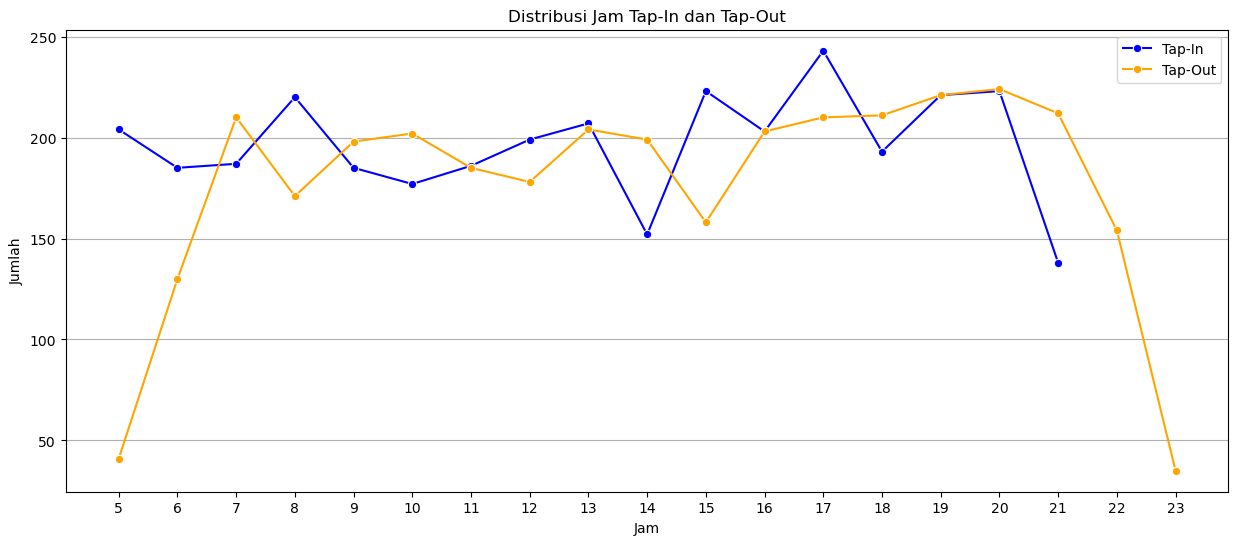

In [ ]:
plt.figure(figsize=(15, 6))

tapin_count = weekend_tj['tapInHour'].value_counts().sort_index()
sns.lineplot(x=tapin_count.index, y=tapin_count.values, color='blue', marker='o', label='Tap-In')

tapout_count = weekend_tj['tapOutHour'].value_counts().sort_index()
sns.lineplot(x=tapout_count.index, y=tapout_count.values, color='orange', marker='o', label='Tap-Out')

plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(axis='y')

plt.xticks(tapout_count.index)

plt.show()

Berdasarkan grafik distribusi Jam *Tap-In* (biru) dan *Tap-Out* (oranye), terlihat bahwa aktivitas penggunaan TransJakarta menunjukkan pola yang relatif merata dengan beberapa puncak yang tidak setajam grafik komuter pada umumnya, menyiratkan adanya penggunaan untuk berbagai tujuan selain hanya pergi/pulang kerja, terutama karena jumlah penggunaan harian cukup tinggi (di atas 150) dari jam 5 pagi hingga 10 malam. Puncak tertinggi terjadi pada **Jam 17 sore** untuk *Tap-In* (**sekitar 245**) yang mengindikasikan lonjakan keberangkatan di sore hari, serta puncak tertinggi untuk *Tap-Out* terjadi pada **Jam 20 sore** (**sekitar 225**) yang menandakan jam kepulangan utama, sehingga TransJakarta perlu memastikan ketersediaan armada yang maksimal, khususnya pada jam 17:00 hingga 21:00, untuk melayani volume penumpang yang tinggi pada periode ini.

**koridor yang sering digunakan di weekend**

In [ ]:
weekend_corr = df[(df['tapInDay'] == "Saturday") | (df['tapInDay'] == "Sunday")].groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
weekend_corr_sorted = weekend_corr.sort_values(by='Count', ascending=False).head(5)
weekend_corr_sorted

,corridorID,corridorName,Count
140,JAK.19,Pinang Ranti - Kampung Rambutan,31
100,9C,Pinang Ranti - Bundaran Senayan,30
133,JAK.120,JIS - Terminal Muara Angke,30
43,2B,Harapan Indah - ASMI,28
13,11N,Rusun Cipinang Muara - Jatinegara,26


**Visualisasi**

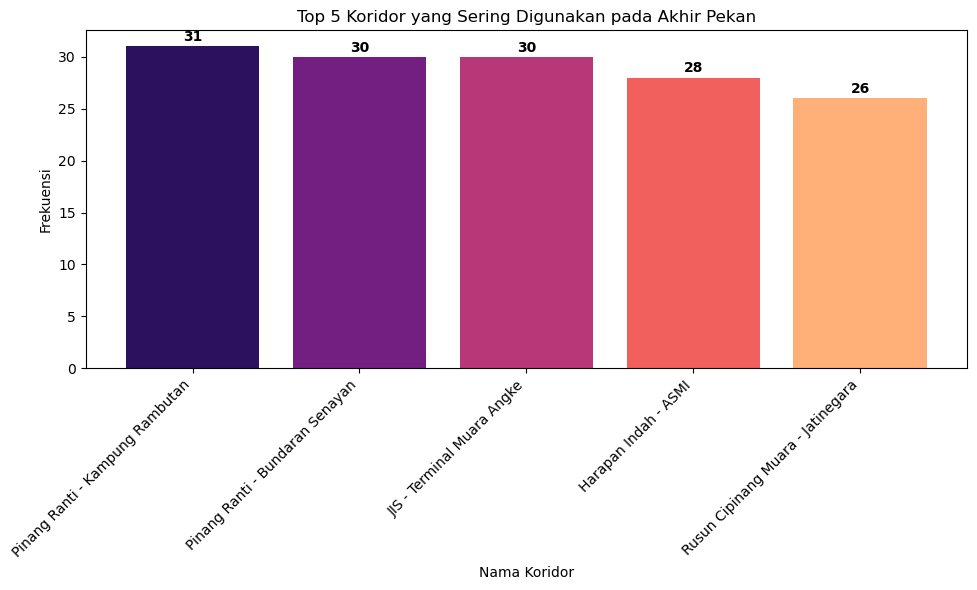

In [ ]:
plt.figure(figsize=(10, 6))
custom_colors = sns.color_palette("magma", len(weekend_corr_sorted))
bars = plt.bar(weekend_corr_sorted['corridorName'], weekend_corr_sorted['Count'], color=custom_colors)

plt.title('Top 5 Koridor yang Sering Digunakan pada Akhir Pekan')
plt.xlabel('Nama Koridor')
plt.ylabel('Frekuensi')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Data penggunaan akhir pekan menunjukkan pola yang merata, dengan Pinang Ranti - Kampung Rambutan (31), Pinang Ranti - Bundaran Senayan (30), dan JIS - Terminal Muara Angke (30) sebagai koridor terpadat, mengindikasikan pergeseran fokus perjalanan dari komuter ke rekreasi dan keluarga. TransJakarta harus memastikan ketersediaan bus berkapasitas besar dan headway yang stabil di semua koridor ini untuk melayani volume penumpang yang tinggi, terutama di rute yang menghubungkan area pemukiman dan tujuan wisata/pusat keramaian (seperti Bundaran Senayan dan Muara Angke), serta menjamin kenyamanan bagi penumpang yang bepergian bersama keluarga.

## **Kesimpulan**

Berikut adalah ringkasan kesimpulan dari analisis kinerja armada dan operasional TransJakarta:

Analisis menunjukkan bahwa meskipun proporsi pengguna dewasa dan paruh baya dominan, **perhatian khusus harus diberikan pada peningkatan fasilitas untuk kelompok rentan (anak-anak dan lansia)**, terutama di koridor prioritas mereka seperti **Kampung Rambutan - Juanda** (anak-anak) dan **Ragunan - Gelora Bung Karno** (lansia), serta mempertimbangkan kembali urgensi armada khusus wanita di koridor padat seperti **Pasar Minggu - Tanah Abang**. Pola perjalanan harian dikuasai oleh jam sibuk (pagi **5-9** dan sore **16-21**), di mana **Koridor Cibubur - Balai Kota** adalah yang terpadat. Kepadatan di Halte menyoroti perlunya revitalisasi segera pada Halte vital yang belum diperluas, termasuk **Garuda Taman Mini, Rusun Kapuk Muara, Monas, Cibubur Junction, dan Penjaringan**, serta fokus manajemen antrian di Halte *Tap-In/Out* terpadat seperti **Penjaringan, BKN, dan Terminal Senen**. Sementara itu, layanan akhir pekan perlu dioptimalkan untuk rute rekreasi seperti **Pinang Ranti - Kampung Rambutan** dan **JIS - Muara Angke**. Secara keseluruhan, PT Transjakarta harus menyesuaikan strategi operasional dengan **menambah armada dan memperbaiki fasilitas di Halte/Koridor kritis** untuk meningkatkan kualitas layanan dan kenyamanan penumpang.

## **Saran dan Rekomendasi**

Berikut adalah ringkasan padat dari rekomendasi strategi untuk peningkatan kinerja TransJakarta:

Rekomendasi strategis TransJakarta harus berfokus pada **inklusi dan optimalisasi kapasitas** selama jam sibuk. Untuk inklusi, perluasan layanan **bus khusus wanita** harus diprioritaskan di koridor padat (Pasar Minggu - Tanah Abang, Poris Plawad - Bundaran Senayan, Rusun Rawa Bebek - Kodamar). Fasilitas untuk **anak-anak** harus ditingkatkan dengan menyediakan area bermain, staf terlatih, dan edukasi keselamatan, sementara layanan untuk **lansia** harus dijamin melalui ketersediaan tempat duduk prioritas, informasi yang mudah dibaca, dan revitalisasi aksesibilitas di halte-halte sulit. Terkait optimalisasi operasional, **penyesuaian jam operasional dan peningkatan/redistribusi armada** harus dilakukan segera di koridor tersibuk seperti **Cibubur - Balai Kota** dan **Ciputat - CSW** untuk mencegah *overcrowding*. Terakhir, **revitalisasi halte** yang padat dan belum diperluas (termasuk Garuda Taman Mini, Rusun Kapuk Muara, dan Penjaringan) serta **penambahan alokasi armada** pada koridor wisata akhir pekan (Pinang Ranti - Kampung Rambutan, JIS - Muara Angke) sangat penting untuk meningkatkan pengalaman perjalanan secara keseluruhan. Sebagai tambahan, TransJakarta bisa mempromosikan halte halte dengan frekuensi pengguna yang padat untuk mendapatkan tambahan profit, bisa dengan cara naming Right seperti yang dilakukan oleh MRT, KRL dan LRT, dengan cara ini profit bisa didapatkan dengan efektif, atau dengan membuat digital board di halte halte dengan jumlah penumpang yang frekuensi perjalanan nya tinggi 

In [ ]:
## Simpan data bersih 

In [42]:
df.to_csv('Transjakarta_clean_new.csv')

**Link Dashboard**

https://public.tableau.com/app/profile/muhammad.zulfan.alghifari/viz/TransJakartaDashboard_17606988230300/ProfilPengguna